**Nama : Siti Ma'rifatul Khoiryah**

**Nim : 210411100007**

# **Tugas 4**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/PPW/report/tugas_ppw/databerita100.csv")
df.head()


,judul,tanggal,isi,kategori
0,Potret Cantik Enzy Storia Saat Kulineran di Pa...,"Rabu, 25 Sep 2024 22:00 WIB",Jakarta - Enzy Storia banjir pujian setelah ta...,Makanan
1,Potret Mesra Sahrul Gunawan Saat Kulineran Bar...,"Rabu, 25 Sep 2024 21:00 WIB",Jakarta - Sahrul Gunawan dan istri gagal punya...,Makanan
2,Ditegur Staf Restoran Gegara Bawa Makanan dari...,"Rabu, 25 Sep 2024 19:30 WIB",Jakarta - Seorang pengunjung restoran jadi sak...,Makanan
3,Unik! Burger Ini Isinya Kepiting Utuh Berukura...,"Rabu, 25 Sep 2024 19:00 WIB",Jakarta - Biasanya burger berisi patty atau da...,Makanan
4,"Qobe Mie: Sensasi Mie Pedas Baru di Bogor, Lar...","Rabu, 25 Sep 2024 18:41 WIB",Jakarta - Ingin coba menikmati sensasi lezat m...,Makanan


In [23]:
# mengambil satu sample berita
sample_berita = df['isi'].iloc[3]
print(sample_berita)

Jakarta - Biasanya burger berisi patty atau daging sapi bundar pipih. Berbeda dengan burger satu ini yang menggunakan kepiting utuh besar sebagai isiannya. Hamburger atau burger merupakan makanan asal Amerika dan Jerman yang sudah mendunia. Konsep makanan ini cukup sederhana yaitu roti bundar atau bun dibelah dua, kemudian diisi oleh patty yang diolah dari daging sapi cincang. Tapi seiring berjalannya waktu, burger memiliki banyak varian terutama isiannya. Di Jepang contohnya, ada satu restoran yang meluncurkan menu burger unik. Isiannya memakai kepiting yang masih utuh dan ukurannya cukup besar. Dilansir dari SoraNews24 (25/09), gerai restoran Dom Dom Burger di Jepang baru saja meluncurkan menu Marugoto Kani Burger. Kani dalam bahasa Jepang berarti kepiting, sementara kata marugoto memiliki artian 'utuh'. Unik!  Burger Ini Isinya Kepiting Utuh Berukuran Besar Foto: Site News Konsep inilah yang diangkat oleh Dom Dom Burger, mereka ingin memberikan pengalaman bersantap baru agar pengunj

**memisahkan perkalimat**

In [24]:
# Membuat list untuk menyimpan hasil
result_list = []

# Pisahkan kalimat berdasarkan titik
sentences = sample_berita.split('.')  # Pisahkan kalimat berdasarkan titik
sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong

# Looping untuk menambahkan setiap kalimat ke result_list
for i, sentence in enumerate(sentences, 1):
    result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

# Membuat DataFrame dari hasil pemisahan
result_df = pd.DataFrame(result_list)

# Tampilkan DataFrame
result_df


,kalimat ke n,kalimat
0,Kalimat ke 1,Jakarta - Biasanya burger berisi patty atau da...
1,Kalimat ke 2,Berbeda dengan burger satu ini yang menggunaka...
2,Kalimat ke 3,Hamburger atau burger merupakan makanan asal A...
3,Kalimat ke 4,Konsep makanan ini cukup sederhana yaitu roti ...
4,Kalimat ke 5,"Tapi seiring berjalannya waktu, burger memilik..."
5,Kalimat ke 6,"Di Jepang contohnya, ada satu restoran yang me..."
6,Kalimat ke 7,Isiannya memakai kepiting yang masih utuh dan ...
7,Kalimat ke 8,"Dilansir dari SoraNews24 (25/09), gerai restor..."
8,Kalimat ke 9,"Kani dalam bahasa Jepang berarti kepiting, sem..."
9,Kalimat ke 10,Unik! Burger Ini Isinya Kepiting Utuh Berukur...


**pre processing**

In [25]:
!pip install Sastrawi

In [26]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import sent_tokenize
import networkx as nx
import matplotlib.pyplot as plt


# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing yang disesuaikan
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<.#?>')
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    data_berita = re.sub(r'\d+', '', data_berita)
    return data_berita

def remove_symbols(data_berita):
    data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
    return data_berita

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

# Looping setiap kalimat di dataframe 'result_df'
result_df['clean'] = result_df['kalimat'].apply(remove_url)
result_df['clean'] = result_df['clean'].apply(remove_html)
result_df['clean'] = result_df['clean'].apply(remove_emoji)
result_df['clean'] = result_df['clean'].apply(remove_symbols)
result_df['clean'] = result_df['clean'].apply(remove_numbers)
result_df['clean'] = result_df['clean'].apply(case_folding)
result_df['tokenize'] = result_df['clean'].apply(tokenize)
result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
result_df['stemming'] = result_df['stopword removal'].apply(stemming)

# Gabungkan kata setelah stemming
result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

# Tampilkan hasil dataframe
result_df[['kalimat ke n', 'final']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,kalimat ke n,final
0,Kalimat ke 1,jakarta burger isi patty daging sapi bundar pipih
1,Kalimat ke 2,beda burger kepiting utuh isi
2,Kalimat ke 3,hamburger burger makan amerika jerman dunia
3,Kalimat ke 4,konsep makan sederhana roti bundar bun belah i...
4,Kalimat ke 5,iring jalan burger milik varian isi
5,Kalimat ke 6,jepang contoh restoran luncur menu burger unik
6,Kalimat ke 7,isi pakai kepiting utuh ukur
7,Kalimat ke 8,lansir soranews gerai restoran dom dom burger ...
8,Kalimat ke 9,kan bahasa jepang kepiting marugoto milik arti...
9,Kalimat ke 10,unik burger isi kepiting utuh ukur foto site n...


**TF-IDF**

menghitung skor TF-IDF (Term Frequency-Inverse Document Frequency) untuk setiap kata dalam kalimat yang telah diproses. Skor ini digunakan untuk mengevaluasi seberapa penting kata-kata tersebut dalam konteks kalimat tersebut. Setelah kalimat digabungkan menjadi dokumen, TF-IDF digunakan untuk membuat matriks yang menunjukkan skor untuk setiap kata. Agar analisis lebih mudah, nama-nama kata (fitur) diambil dan hasil TF-IDF diubah menjadi tabel. Selanjutnya, untuk setiap kalimat ditambahkan kolom identifikasi, dan akhirnya, tabel ditampilkan dengan skor TF-IDF dari kata-kata yang ada di dalamnya.

In [27]:
# Gabungkan semua kalimat hasil stemming menjadi dokumen untuk tiap kalimat
documents = result_df['final'].tolist()

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Terapkan TF-IDF ke dokumen (kalimat yang sudah dipreproses)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mendapatkan nama-nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Tambahkan kolom 'no' dan 'kalimat ke n' untuk identifikasi
tfidf_df.insert(0, 'kalimat ke n', result_df['kalimat ke n'])

# Tampilkan dataframe dengan skor TF-IDF
tfidf_df

,kalimat ke n,alam,alas,aman,amerika,angkat,apit,arti,bahasa,balut,...,tentu,tepung,terima,tusuk,ukur,unik,unjung,utuh,varian,yen
0,Kalimat ke 1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Kalimat ke 2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.442827,0.000000,0.000000
2,Kalimat ke 3,0.000000,0.000000,0.000000,0.456226,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Kalimat ke 4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kalimat ke 5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.491252,0.000000
5,Kalimat ke 6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.390218,0.000000,0.000000,0.000000,0.000000
6,Kalimat ke 7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.464820,0.000000,0.000000,0.406601,0.000000,0.000000
7,Kalimat ke 8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Kalimat ke 9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.438917,0.438917,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.286293,0.000000,0.000000
9,Kalimat ke 10,0.247016,0.000000,0.000000,0.000000,0.247016,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.184191,0.199490,0.247016,0.322242,0.000000,0.000000


**Menghitung kemiripan dalam kalimat**

Setelah menggunakan TF-IDF untuk mengubah kalimat dalam kumpulan teks menjadi angka, cosine similarity kedua kalimat dihitung. Nilai yang mendekati 1 menunjukkan bahwa dua kalimat sangat mirip, sedangkan nilai yang mendekati 0 menunjukkan bahwa mereka tidak mirip sama sekali.

In [28]:
# Menghitung cosine similarity antar kalimat berdasarkan TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat dataframe untuk menyimpan hasil cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks cosine similarity
cosine_sim_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 17,Kalimat ke 18,Kalimat ke 19,Kalimat ke 20,Kalimat ke 21,Kalimat ke 22,Kalimat ke 23,Kalimat ke 24,Kalimat ke 25,Kalimat ke 26
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1.000000,0.142201,0.029589,0.439426,0.102897,0.031337,0.090140,0.041016,0.000000,0.083780,...,0.108109,0.0,0.000000,0.029281,0.0,0.0,0.026447,0.019480,0.056678,0.0
Kalimat ke 2,0.142201,1.000000,0.047138,0.070818,0.163925,0.049923,0.430585,0.065343,0.202068,0.360912,...,0.421272,0.0,0.000000,0.046648,0.0,0.0,0.112082,0.031034,0.136709,0.0
Kalimat ke 3,0.029589,0.047138,1.000000,0.091474,0.034109,0.033549,0.000000,0.043911,0.000000,0.051453,...,0.054728,0.0,0.000000,0.031348,0.0,0.0,0.270993,0.020855,0.018788,0.0
Kalimat ke 4,0.439426,0.070818,0.091474,1.000000,0.051243,0.000000,0.065024,0.000000,0.000000,0.085572,...,0.041110,0.0,0.000000,0.000000,0.0,0.0,0.163522,0.000000,0.028226,0.0
Kalimat ke 5,0.102897,0.163925,0.034109,0.051243,1.000000,0.036124,0.103910,0.047282,0.140631,0.096579,...,0.124625,0.0,0.000000,0.033754,0.0,0.0,0.030487,0.022456,0.152035,0.0
Kalimat ke 6,0.031337,0.049923,0.033549,0.000000,0.036124,1.000000,0.000000,0.425253,0.117918,0.132338,...,0.182161,0.0,0.148134,0.138587,0.0,0.0,0.029986,0.162310,0.105172,0.0
Kalimat ke 7,0.090140,0.430585,0.000000,0.065024,0.103910,0.000000,1.000000,0.000000,0.185538,0.346700,...,0.448629,0.0,0.000000,0.000000,0.0,0.0,0.064227,0.000000,0.099855,0.0
Kalimat ke 8,0.041016,0.065343,0.043911,0.000000,0.047282,0.425253,0.000000,1.000000,0.258215,0.275103,...,0.075865,0.0,0.096944,0.112424,0.0,0.0,0.039248,0.120677,0.305079,0.0
Kalimat ke 9,0.000000,0.202068,0.000000,0.000000,0.140631,0.117918,0.185538,0.258215,1.000000,0.147044,...,0.161009,0.0,0.000000,0.000000,0.0,0.0,0.045223,0.000000,0.107471,0.0


**Menghiutng matriks adjacency berdasarkan nilai ambang batas**

membuat matriks jarak berdasarkan nilai cosine similarity antara dua kalimat. Pertama, ambang batas ditetapkan pada 0,5, yang berarti bahwa nilai cosine similarity antara dua kalimat akan diberi nilai 1 yang menunjukkan adanya keterkaitan antara mereka, sementara nilai yang lebih rendah dari 0,5 akan diberi nilai 0 yang menunjukkan tidak adanya keterkaitan. Hasil disimpan dalam matriks berdekatan, yang kemudian diubah menjadi "dataframe" untuk menampilkan hasilnya dengan lebih jelas, dengan baris dan kolom untuk setiap kalimat.

In [29]:
# Tetapkan ambang batas (threshold) 0.5
threshold = 0.4

# Buat matriks adjacency: jika cosine similarity >= 0.5, maka 1; jika tidak, maka 0
adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

# Buat dataframe untuk menampilkan matriks adjacency
adjacency_df = pd.DataFrame(adjacency_matrix, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks adjacency
adjacency_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 17,Kalimat ke 18,Kalimat ke 19,Kalimat ke 20,Kalimat ke 21,Kalimat ke 22,Kalimat ke 23,Kalimat ke 24,Kalimat ke 25,Kalimat ke 26
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Kalimat ke 3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 6,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 7,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Kalimat ke 8,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


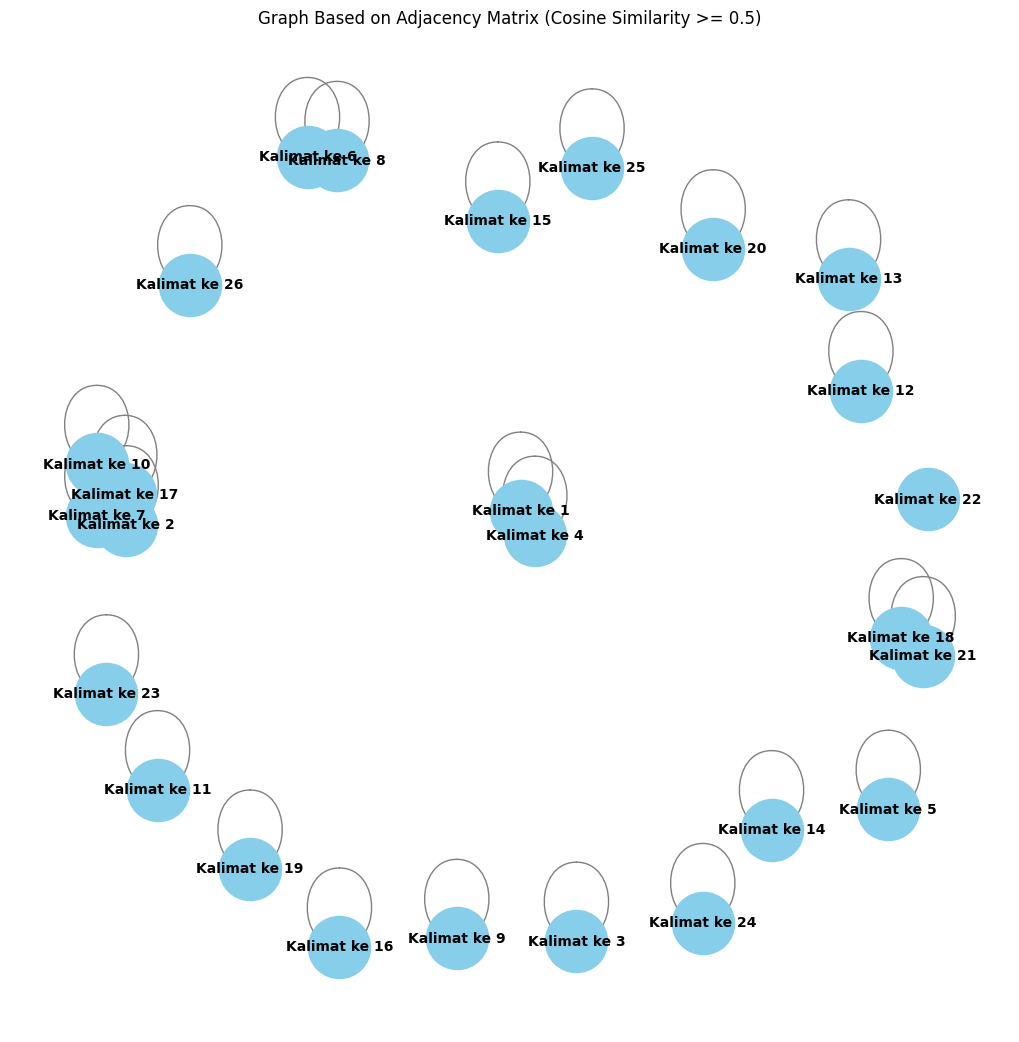

In [30]:
# Buat graf dari matriks adjacency
G = nx.from_numpy_array(adjacency_matrix)

# Atur label node agar sesuai dengan 'kalimat ke n'
mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
G = nx.relabel_nodes(G, mapping)

# Menggambar graf
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Atur layout graf
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')

# Tampilkan graf
plt.title("Graph Based on Adjacency Matrix (Cosine Similarity >= 0.5)")
plt.show()

In [31]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Buat dataframe untuk menampilkan hasil centrality
centrality_df = pd.DataFrame({
    'Kalimat': list(betweenness_centrality.keys()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})

# Tampilkan dataframe centrality
centrality_df


,Kalimat,Betweenness Centrality,Degree Centrality,Closeness Centrality
0,Kalimat ke 1,0.000000,0.12,0.040
1,Kalimat ke 2,0.000000,0.16,0.090
2,Kalimat ke 3,0.000000,0.08,0.000
3,Kalimat ke 4,0.000000,0.12,0.040
4,Kalimat ke 5,0.000000,0.08,0.000
5,Kalimat ke 6,0.000000,0.12,0.040
6,Kalimat ke 7,0.000000,0.16,0.090
7,Kalimat ke 8,0.000000,0.12,0.040
8,Kalimat ke 9,0.000000,0.08,0.000
9,Kalimat ke 10,0.000000,0.12,0.072
